In [13]:
from platform import python_version
print(python_version())
import torch
print(torch.cuda.get_device_name(torch.cuda.current_device()))

3.10.4
NVIDIA GeForce GTX 1080 Ti


In [14]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import json
import numpy as np
import scipy as sp
import scipy.stats as st
import scipy.integrate as integrate
from scipy.stats import multivariate_normal
from sklearn import linear_model
# from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
import statsmodels.api as sm
from matplotlib.colors import LogNorm

sns.set_style("whitegrid")
sns.set_palette("colorblind")
palette = sns.color_palette()
figsize = (15,8)
legend_fontsize = 16

from matplotlib import rc
rc('font',**{'family':'sans-serif'})
rc('text', usetex=True)
rc('text.latex',preamble=r'\usepackage[utf8]{inputenc}')
rc('text.latex',preamble=r'\usepackage[russian]{babel}')
rc('figure', **{'dpi': 300})

In [15]:
import torch.optim as optim
# optimizer = optim.SGD(model.parameters(), lr=0.1)

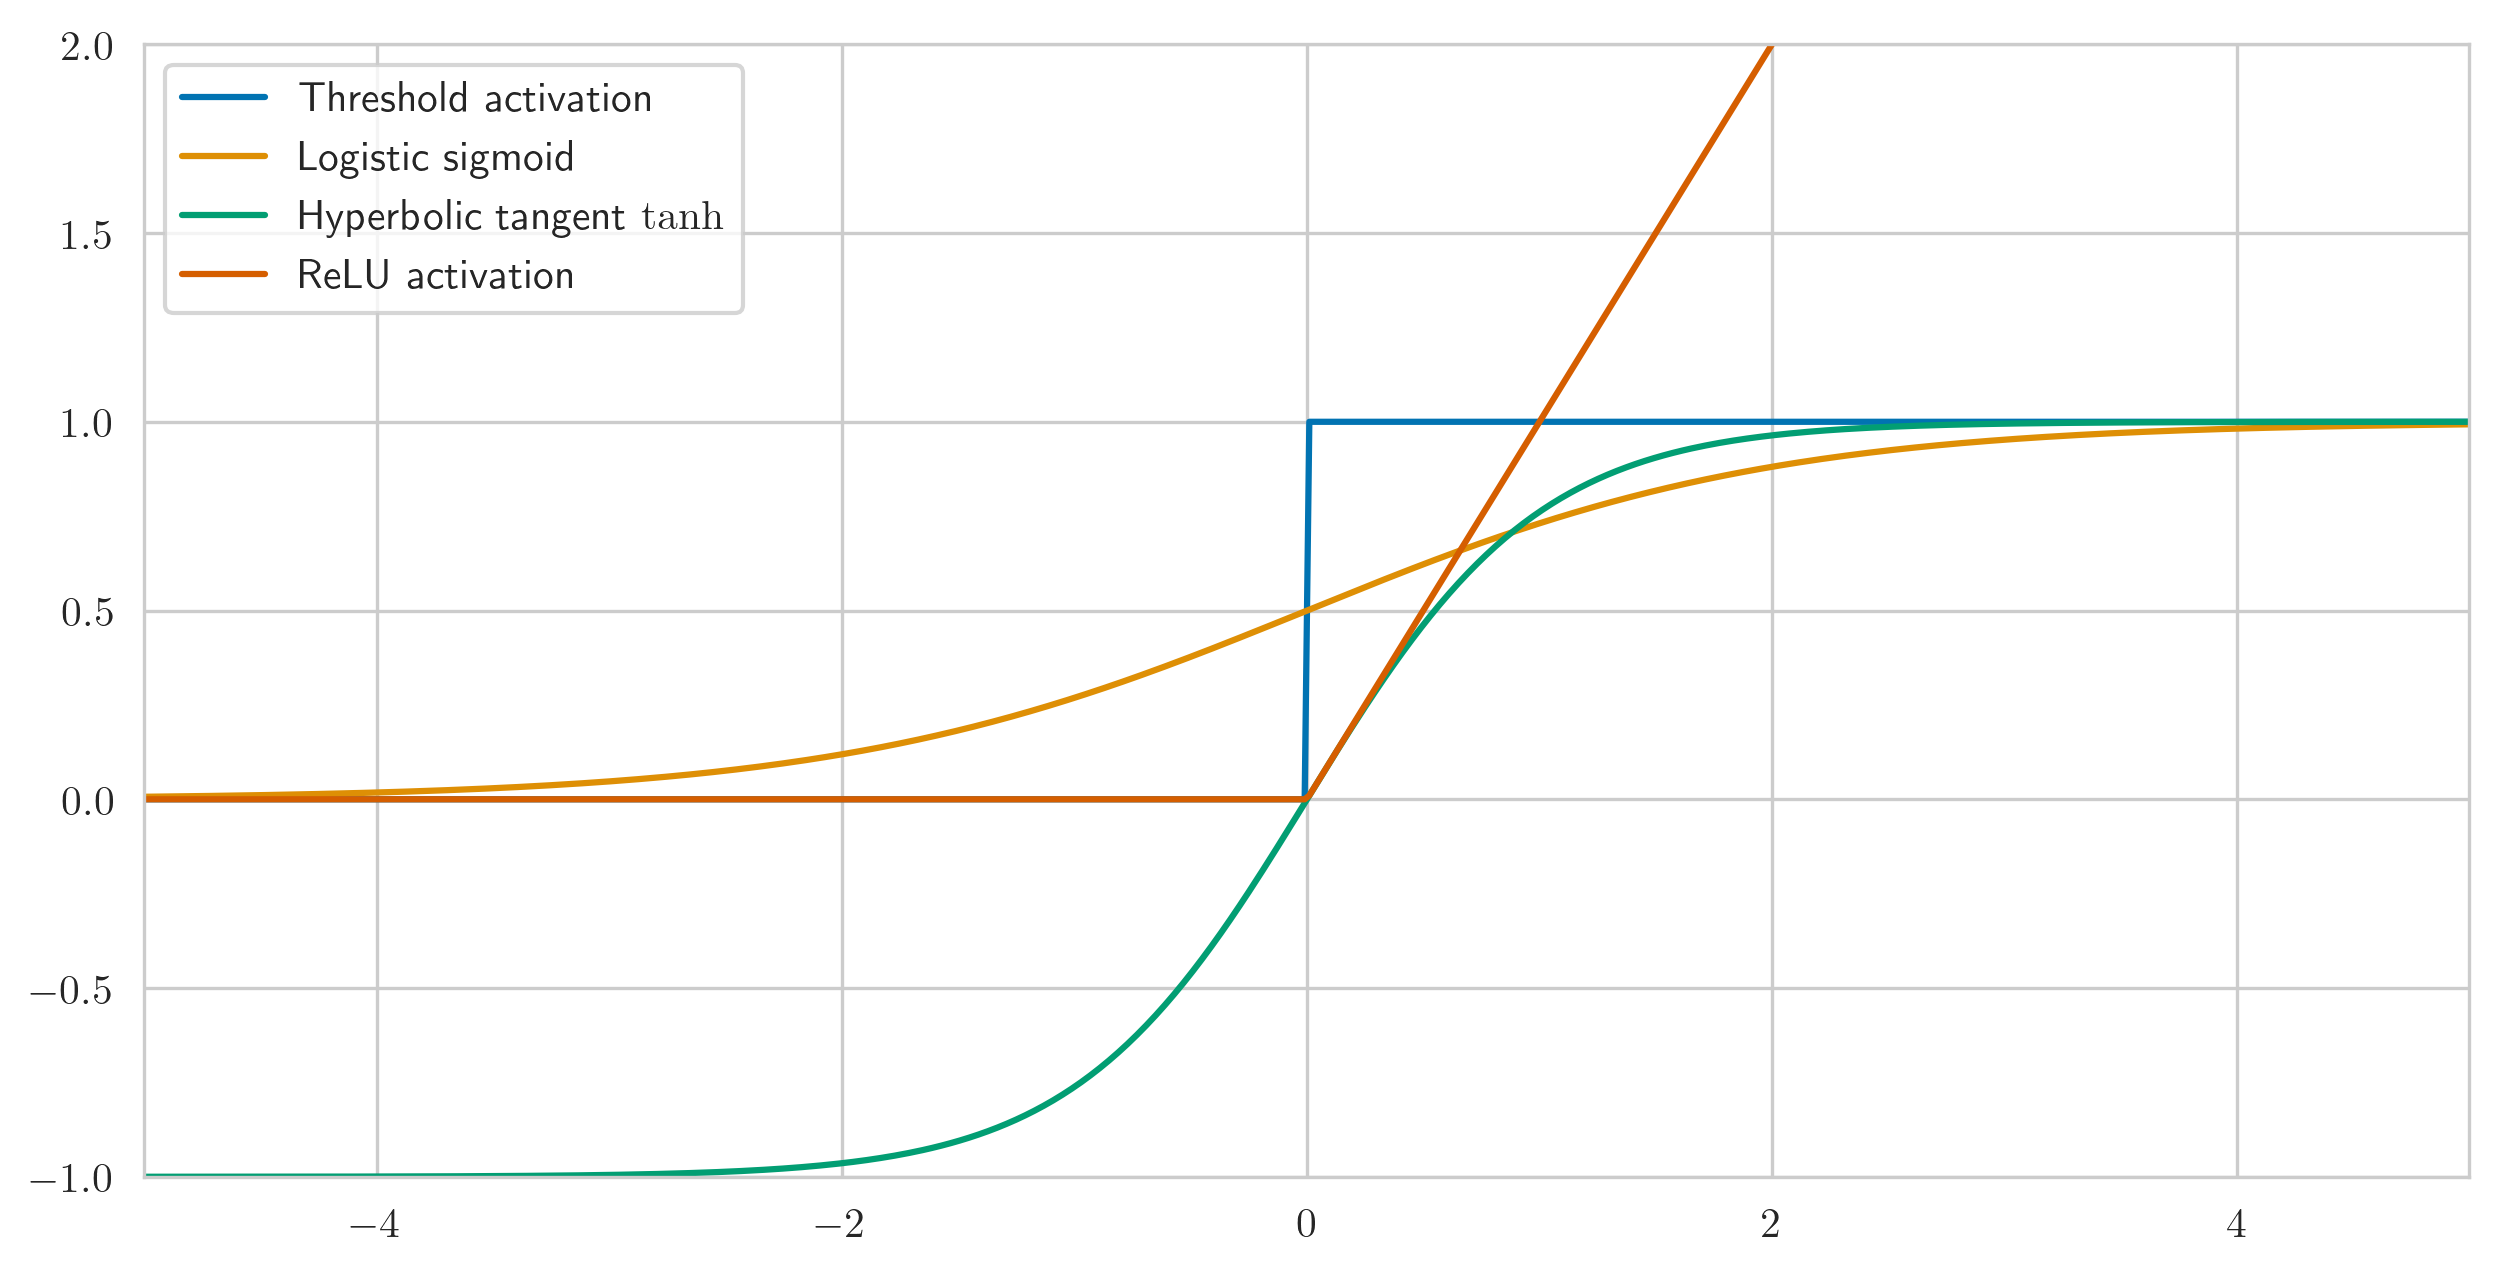

In [16]:
fig, ax = plt.subplots(figsize=(10,5))
xs = np.linspace(-5, 5, 500)
lw = 1.5

relu = np.vectorize(lambda x : max(0.0, x))
thresh = np.vectorize(lambda x : 1 if x >= 0 else 0)

ax.plot(xs, thresh(xs), linewidth=lw, label="Threshold activation")
ax.plot(xs, 1. / (1 + np.exp(-xs)), linewidth=lw, label="Logistic sigmoid")
ax.plot(xs, np.tanh(xs), linewidth=lw, label="Hyperbolic tangent $\\tanh$")
ax.plot(xs, relu(xs), linewidth=lw, label="ReLU activation")

ax.set_ylim((-1., 2.))
ax.set_xlim((-5., 5.))
ax.legend(loc="upper left")

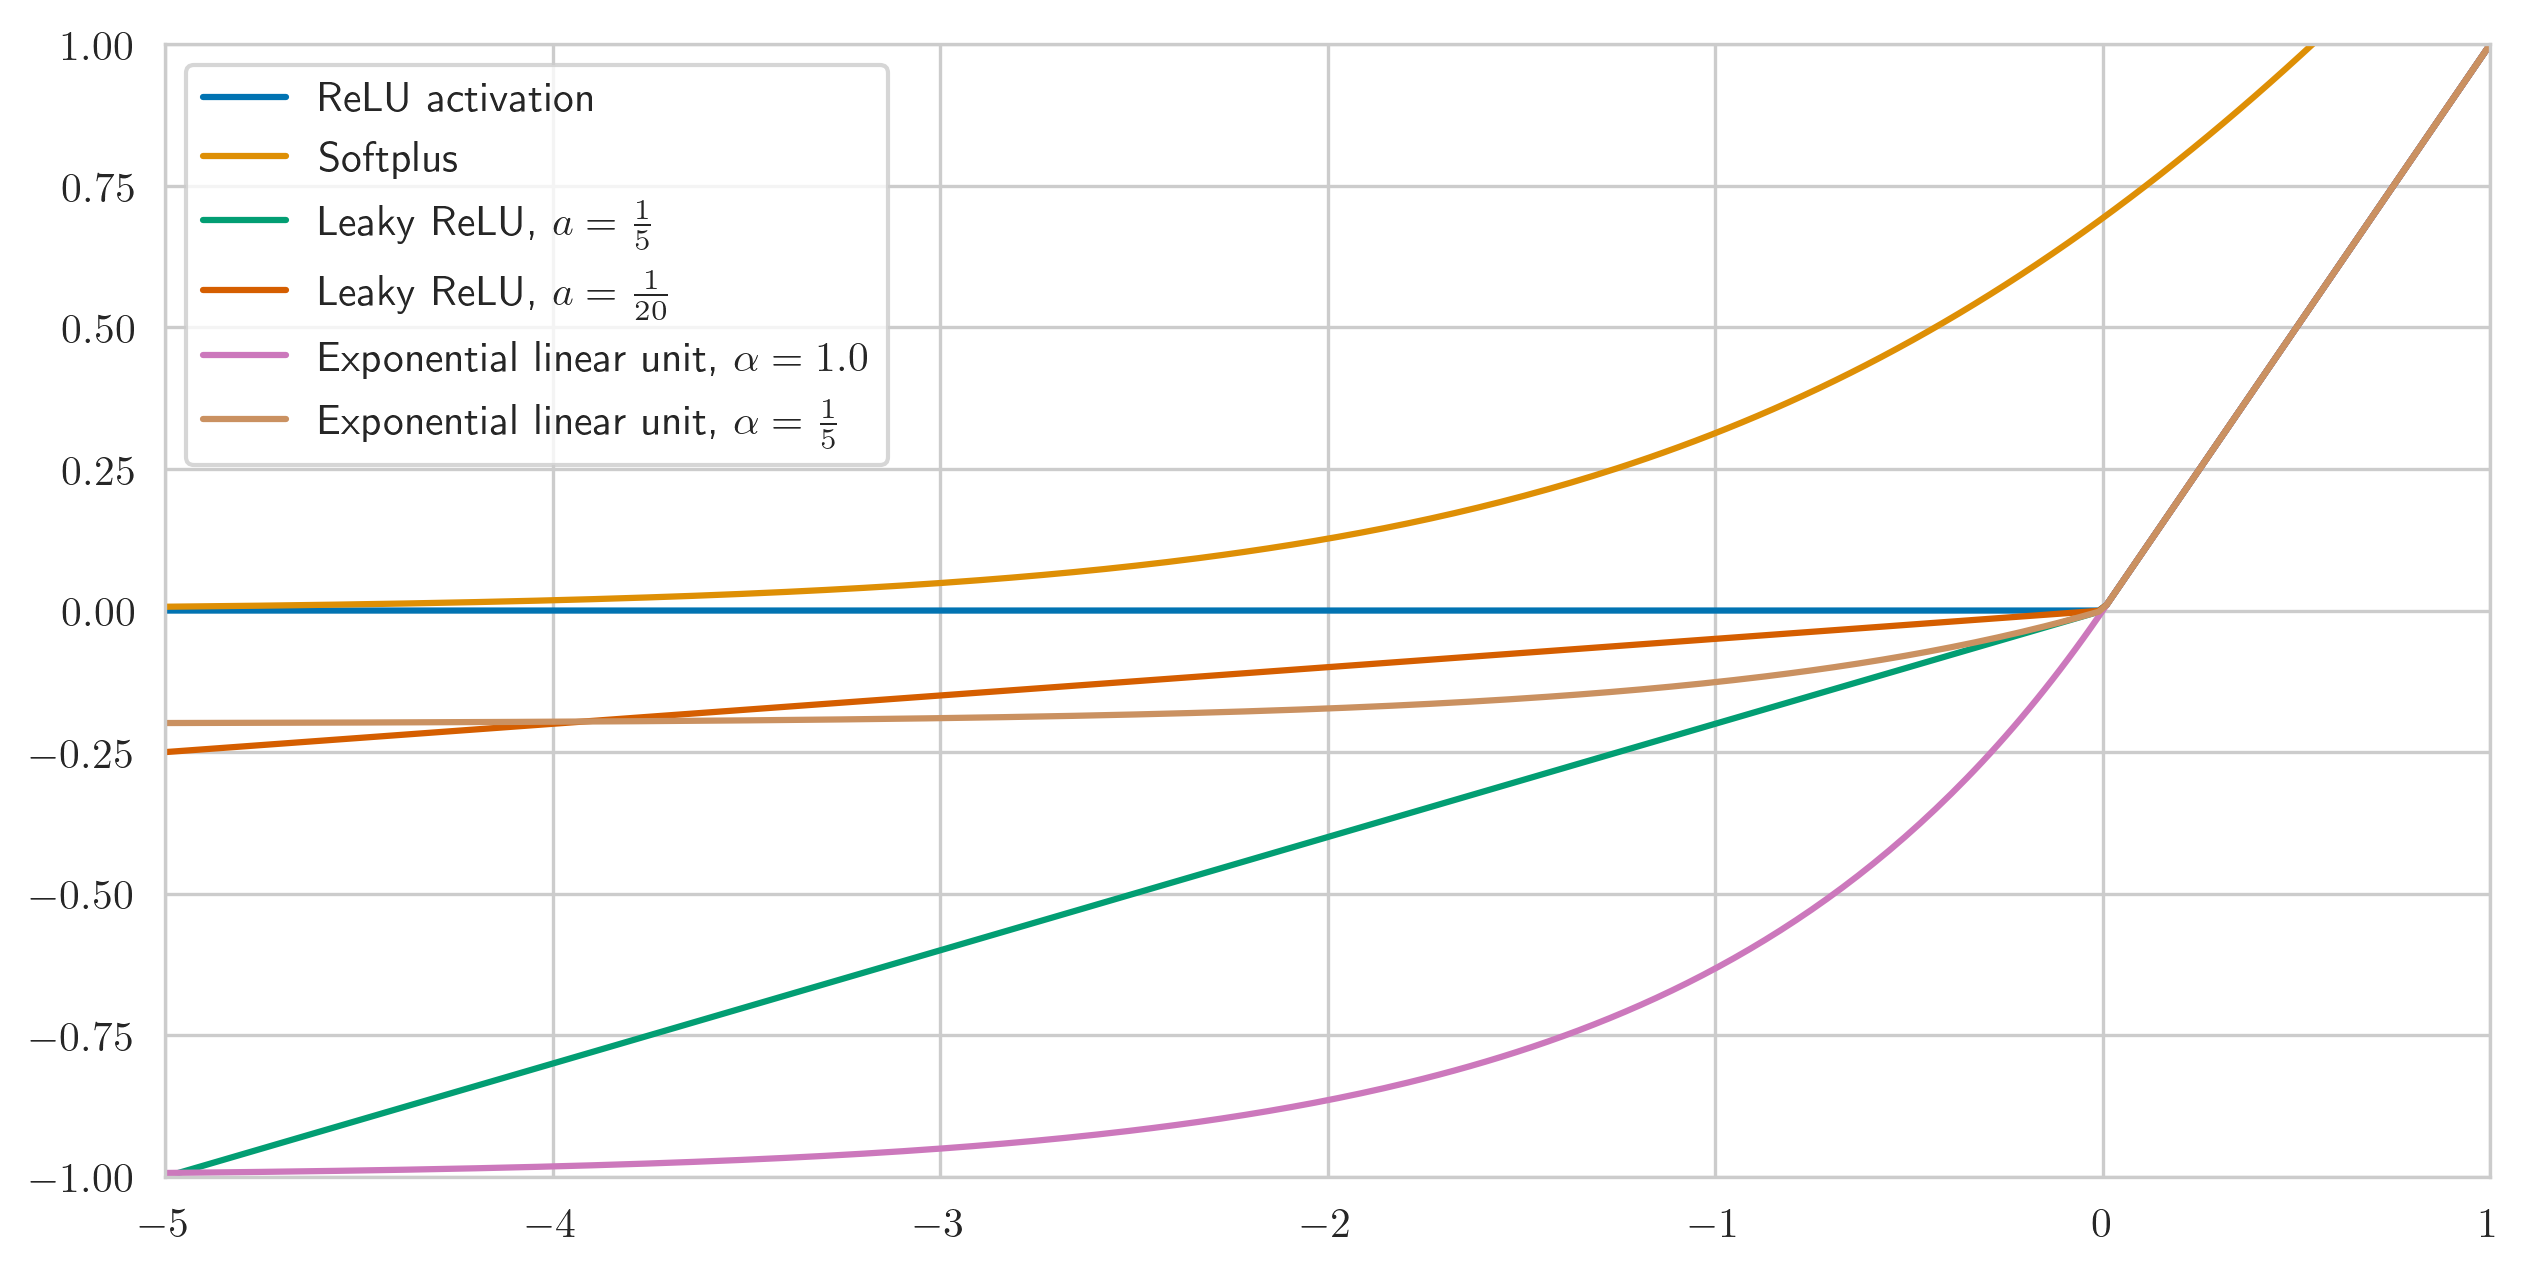

In [17]:
fig, ax = plt.subplots(figsize=(10,5))
xs = np.linspace(-5, 5, 500)
lw = 1.5

relu = np.vectorize(lambda x : max(0.0, x))
softplus = np.vectorize(lambda x : np.log(1 + np.exp(x)))
lrelu = np.vectorize(lambda x : x if x >= 0 else 0.2*x)
lrelu2 = np.vectorize(lambda x : x if x >= 0 else 0.05*x)
elu = np.vectorize(lambda x : x if x >= 0 else 1.0*(np.exp(x)-1))
elu2 = np.vectorize(lambda x : x if x >= 0 else 0.2*(np.exp(x)-1))
thresh = np.vectorize(lambda x : 1 if x >= 0 else 0)

ax.plot(xs, relu(xs), linewidth=lw, label="ReLU activation")
ax.plot(xs, softplus(xs), linewidth=lw, label="Softplus")
ax.plot(xs, lrelu(xs), linewidth=lw, label="Leaky ReLU, $a=\\frac{1}{5}$")
ax.plot(xs, lrelu2(xs), linewidth=lw, label="Leaky ReLU, $a=\\frac{1}{20}$")
ax.plot(xs, elu(xs), linewidth=lw, label="Exponential linear unit, $\\alpha=1.0$")
ax.plot(xs, elu2(xs), linewidth=lw, label="Exponential linear unit, $\\alpha=\\frac{1}{5}$")

ax.set_ylim((-1., 1.))
ax.set_xlim((-5., 1.))
ax.legend(loc="upper left")

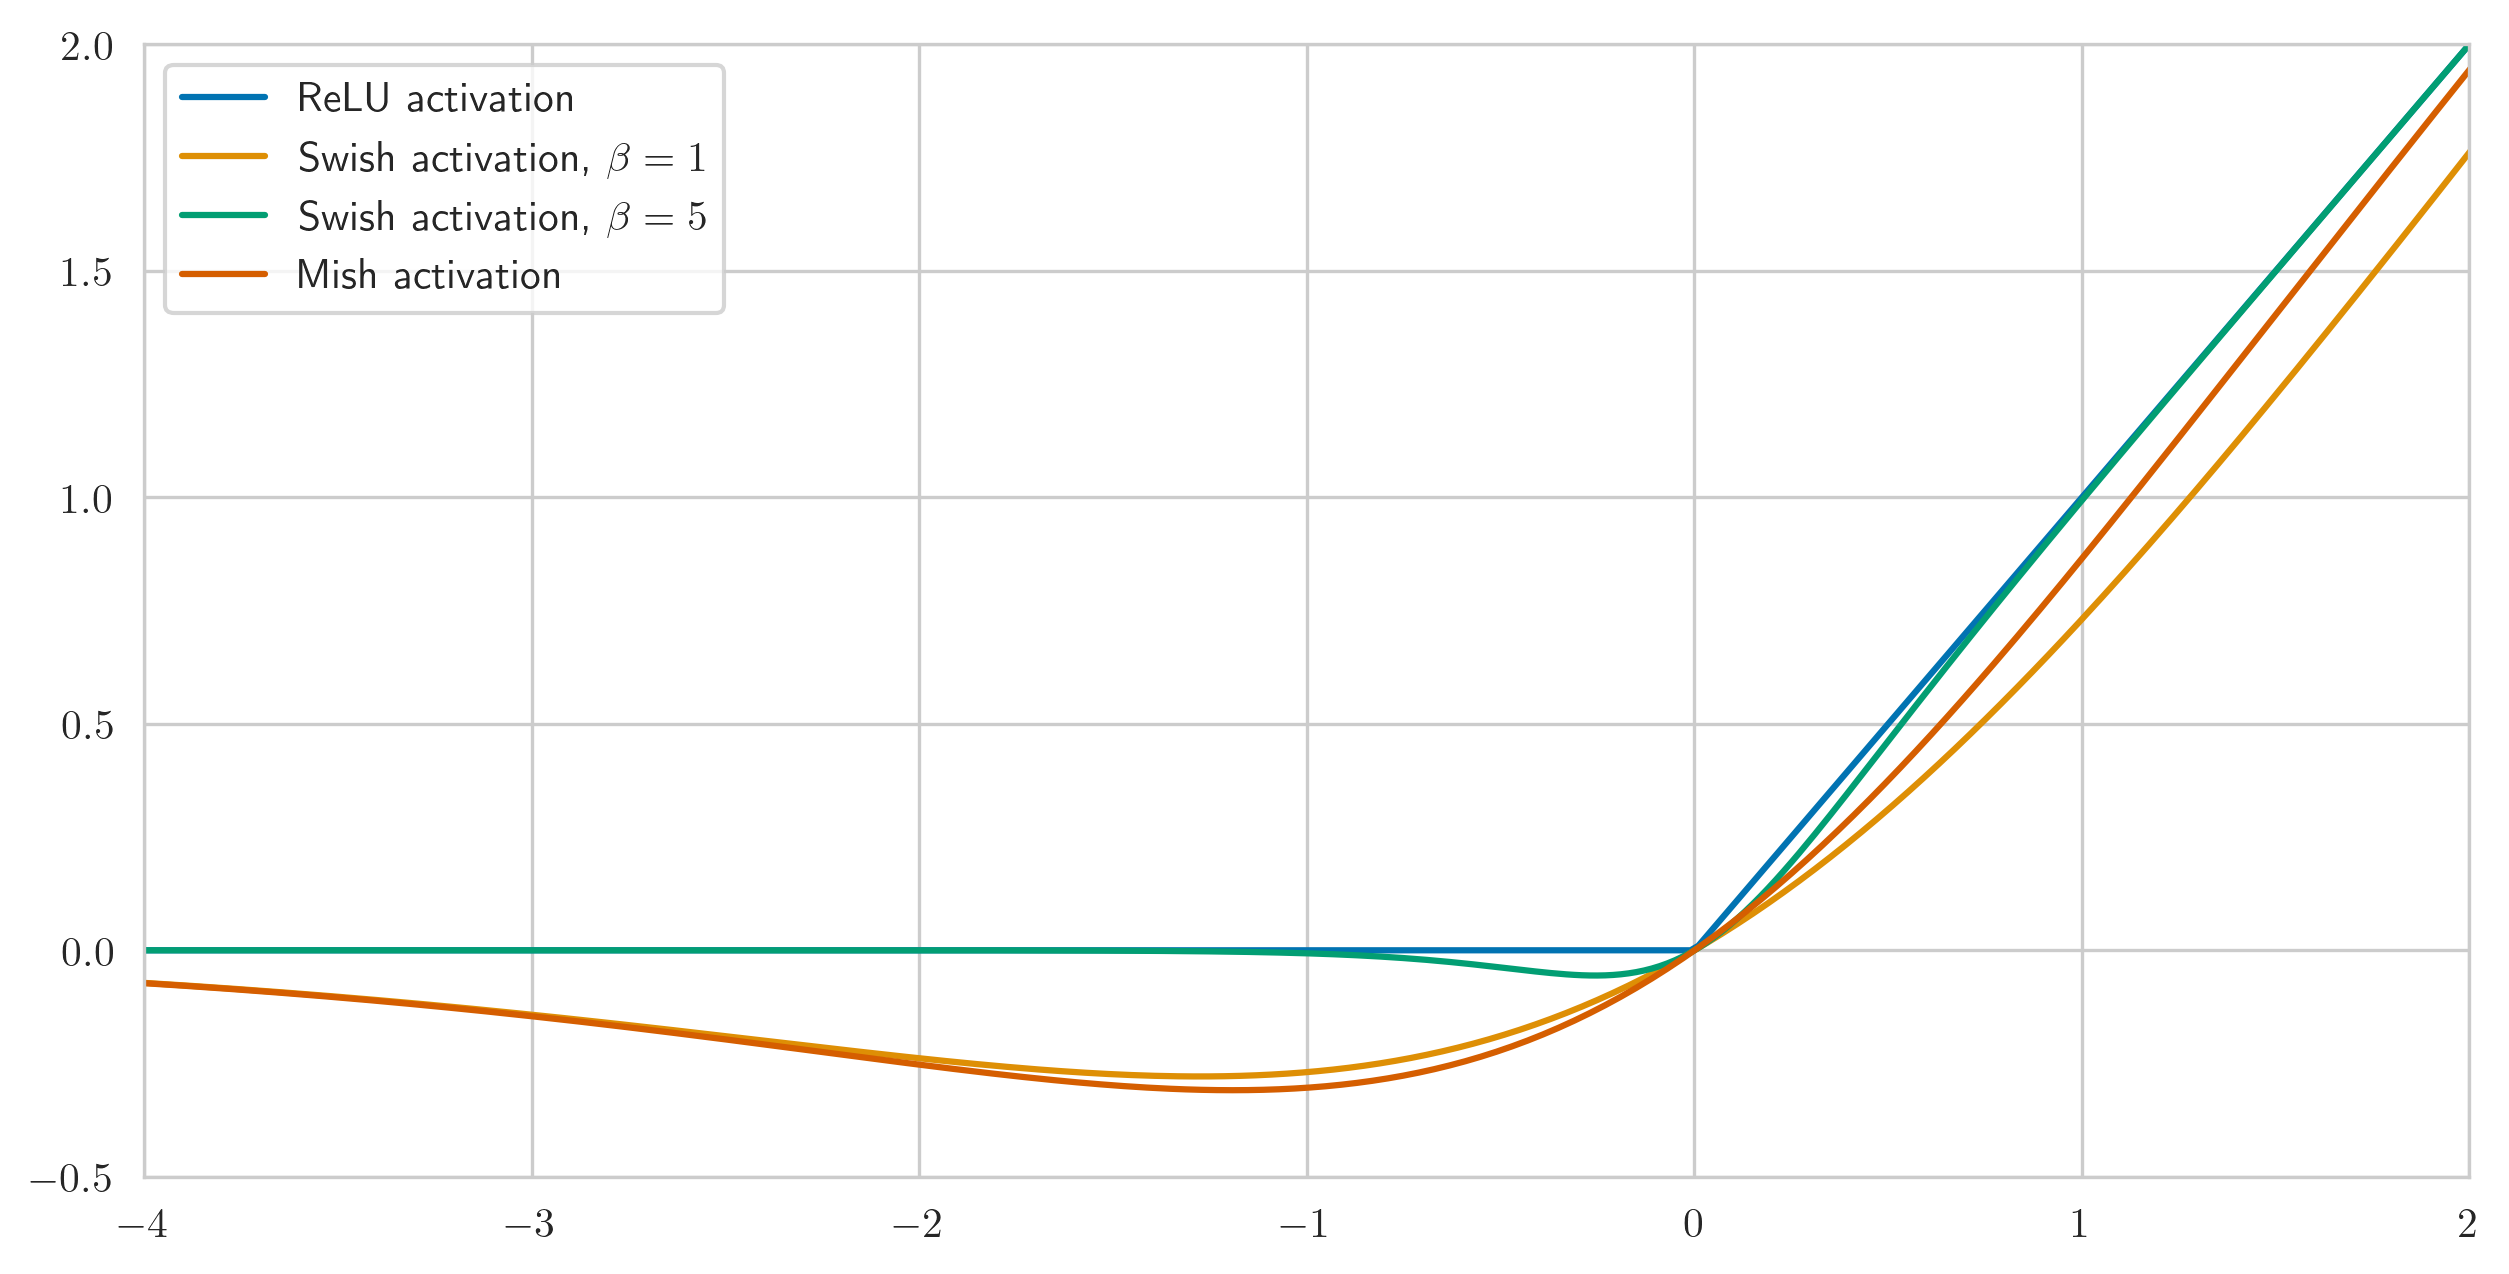

In [18]:
fig, ax = plt.subplots(figsize=(10,5))
xs = np.linspace(-5, 5, 500)
lw = 1.5

relu = np.vectorize(lambda x : max(0.0, x))
swish = np.vectorize( lambda x : x / (1. + np.exp(-x)))
swish2 = np.vectorize( lambda x : x / (1. + np.exp(-5*x)))
mish = np.vectorize(lambda x : x * np.tanh(np.log(1 + np.exp(x))))

ax.plot(xs, relu(xs), linewidth=lw, label="ReLU activation")
ax.plot(xs, swish(xs), linewidth=lw, label="Swish activation, $\\beta=1$")
ax.plot(xs, swish2(xs), linewidth=lw, label="Swish activation, $\\beta=5$")
ax.plot(xs, mish(xs), linewidth=lw, label="Mish activation")

ax.set_ylim((-.5, 2.))
ax.set_xlim((-4., 2.))
ax.legend(loc="upper left")

In [12]:
fig, ax = plt.subplots(figsize=(10,5))
xs = np.linspace(-5, 5, 500)
lw = 1.5

def aconc(a1, a2, beta):
    return lambda x : (a1-a2)*x / (1.0 + np.exp(-x*beta*(a1-a2))) + a2*x

acon1 = np.vectorize( aconc(1.0, 0.0, 1.0) )
acon2 = np.vectorize( aconc(1.2, -0.1, 1.0) )
acon3 = np.vectorize( aconc(1.0, -0.8, 1.0) )
acon4 = np.vectorize( aconc(1.0, -0.8, 0.1) )
acon5 = np.vectorize( aconc(1.0, -0.8, 0.01) )

ax.plot(xs, acon1(xs), linewidth=lw, label="ACON-C, $a_1=1$, $a_2=0$, $\\beta=1$")
ax.plot(xs, acon2(xs), linewidth=lw, label="ACON-C, $a_1=1.2$, $a_2=-0.1$, $\\beta=1$")
ax.plot(xs, acon3(xs), linewidth=lw, color="C3", label="ACON-C, $a_1=1$, $a_2=-0.8$, $\\beta=1$")
ax.plot(xs, acon4(xs), linewidth=lw, color="C3", linestyle="dashed", label="ACON-C, $a_1=1$, $a_2=-0.8$, $\\beta=0.1$")
ax.plot(xs, acon5(xs), linewidth=lw, color="C3", linestyle="dotted", label="ACON-C, $a_1=1$, $a_2=-0.8$, $\\beta=0.01$")

ax.set_ylim((-.5, 4.))
ax.set_xlim((-4., 4.))
ax.legend(loc="upper center")